Импортируем нужные библиотеки


In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
%matplotlib inline

Считываем данные


In [176]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')
train_df

Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Анализируем данные на пропуски, категориальные признаки. Визуализиируем данные. Проверяем баланс классов, так как используется метрика accuracy


In [177]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [178]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [179]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [180]:
print(f'Count of NaN in train dataset:\n{train_df.isna().sum()}')

Count of NaN in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [181]:
train_df = train_df.drop(columns = ['Cabin','Ticket','Name'])
test_df = test_df.drop(columns = ['Cabin','Ticket','Name'])
print(f'Count of NaN in train dataset:\n{train_df.isna().sum()}')

Count of NaN in train dataset:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [182]:
print(f'Count of NaN in test dataset:\n{test_df.isna().sum()}')

Count of NaN in test dataset:
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


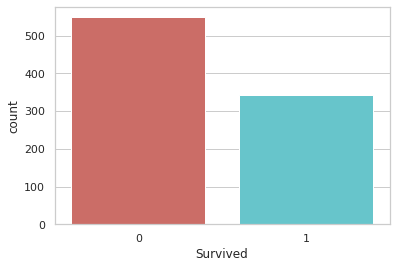

In [183]:
y_data = pd.DataFrame(train_df['Survived']) # Смотрим на балансировку классов
sns.set(style='whitegrid')
sns.countplot(x = 'Survived', data = y_data, palette='hls')

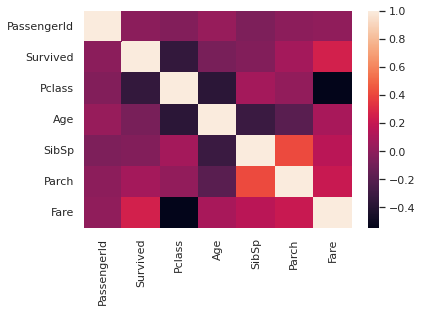

In [184]:
sns.heatmap(train_df.corr())

In [185]:
cols = ['Sex','Embarked']
for col in cols:
  le = preprocessing.LabelEncoder() # Преобразуем категориальные признаки
  train_df[col] = le.fit_transform(train_df[col])
  test_df[col] = le.fit_transform(test_df[col])

In [186]:
knn = KNNImputer(n_neighbors=15) # Заполним пропуски методом k-ближайших соседей
df = knn.fit_transform(train_df)
df_test = knn.fit_transform(test_df)
train_df = pd.DataFrame(data=df,columns=train_df.columns)
test_df = pd.DataFrame(data=df_test,columns=test_df.columns)

In [187]:
new = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
try:
  for i in new:
     train_df[i] = train_df[i].astype(int)
     test_df[i] = test_df[i].astype(int)
except KeyError:
  pass

In [188]:
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

In [189]:
smote = SMOTE(random_state = 0)

In [190]:
column = X.columns
print('Before balance')
print(X.shape)
print(y.value_counts())

Before balance
(891, 8)
0    549
1    342
Name: Survived, dtype: int64


In [191]:
smote_X, smote_y = smote.fit_resample(X, y) # Балансировка классов
smote_X = pd.DataFrame(data = smote_X, columns = column)
smote_y = pd.DataFrame(data = smote_y, columns = ['Survived'])

In [192]:
print('After balance')
print(smote_X.shape)
print(smote_y.value_counts())

After balance
(1098, 8)
Survived
0           549
1           549
dtype: int64


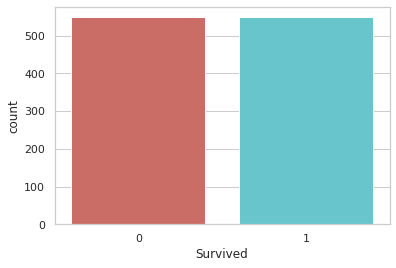

In [193]:
y_data = pd.DataFrame(train_df['Survived'])
sns.set(style='whitegrid')
sns.countplot(x = 'Survived', data = smote_y, palette='hls')

In [194]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,2,1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,3,1,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,4,1,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,5,0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0
887,888,1,1.0,0.0,19.0,0.0,0.0,30.0000,2.0
888,889,0,3.0,0.0,27.0,1.0,2.0,23.4500,2.0
889,890,1,1.0,1.0,26.0,0.0,0.0,30.0000,0.0


Разделяем тренировочные данные на тренировочную и валидационную часть

In [195]:
X_train, X_test, y_train, y_test = train_test_split(smote_X, smote_y, test_size=0.25)

In [196]:
model = RandomForestClassifier() # Случайный лес
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

<ipython-input-196-2ecdc51fd77f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


In [197]:
print(accuracy_score(y_test,y_pred))

0.8690909090909091


In [198]:
model_xgb = xgb.XGBClassifier() # Градиентный бустинг
model_xgb.fit(X_train, y_train)
y_pred_new = model_xgb.predict(X_test)
print(accuracy_score(y_test,y_pred_new))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8654545454545455


Используем подбор гиперпараметров для оптимизации модели с помощью GridSearchCV

In [199]:
params = {
    'max_depth' : np.arange(1,6),
    'n_estimators' : np.arange(50,300,50),
}
model_xgb_new = GridSearchCV(model_xgb, param_grid = params, cv = 5)
model_xgb_new.fit(X_train, y_train)
model_xgb_new.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

{'max_depth': 5, 'n_estimators': 50}

In [200]:
model_xgb_new = xgb.XGBClassifier(max_depth = 4, n_estimators= 150) # Обновленная модель бустинга
model_xgb_new.fit(X_train, y_train)
y_pred = model_xgb_new.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.850909090909091


In [201]:
clf = RandomForestClassifier(max_depth = 5, n_estimators = 150) # Новый случайный лес(ручная настройка)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(accuracy_score(y_test,clf_pred))

0.8763636363636363


<ipython-input-201-fa414e37d7df>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [202]:
y_ans = model_xgb.predict(test_df) # Предсказываем для тестовых данных

In [203]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

Подготавливаем ответы

In [204]:
answer = pd.DataFrame(data = y_ans ,columns=['Survived'])
con = pd.DataFrame(data=test_df['PassengerId'],columns=['PassengerId'])
result = pd.concat([con, answer],axis=1)
result = result.reset_index(drop=True)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [205]:
result.to_csv("predict.csv",index=False)

In [206]:
from google.colab import files
files.download("predict.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

С помощью данного бейзлайна на Kaggle удалось выбить accuracy = 77.990, что позволило попасть в топ 18%.
Стоит отметить, что можно улучшить результат с помощью feature-engineering + масштабирования данных. Также стоило рассмотреть другие алгоритмы или другие библиотеки для бустинга, например - LightGBM, который работает быстрее, но хуже в точности, чем XGBoost. Также можно было бы использовать CatBoost в случае множественных категориальных признаков, создавшиеся, например, в процессе FE.

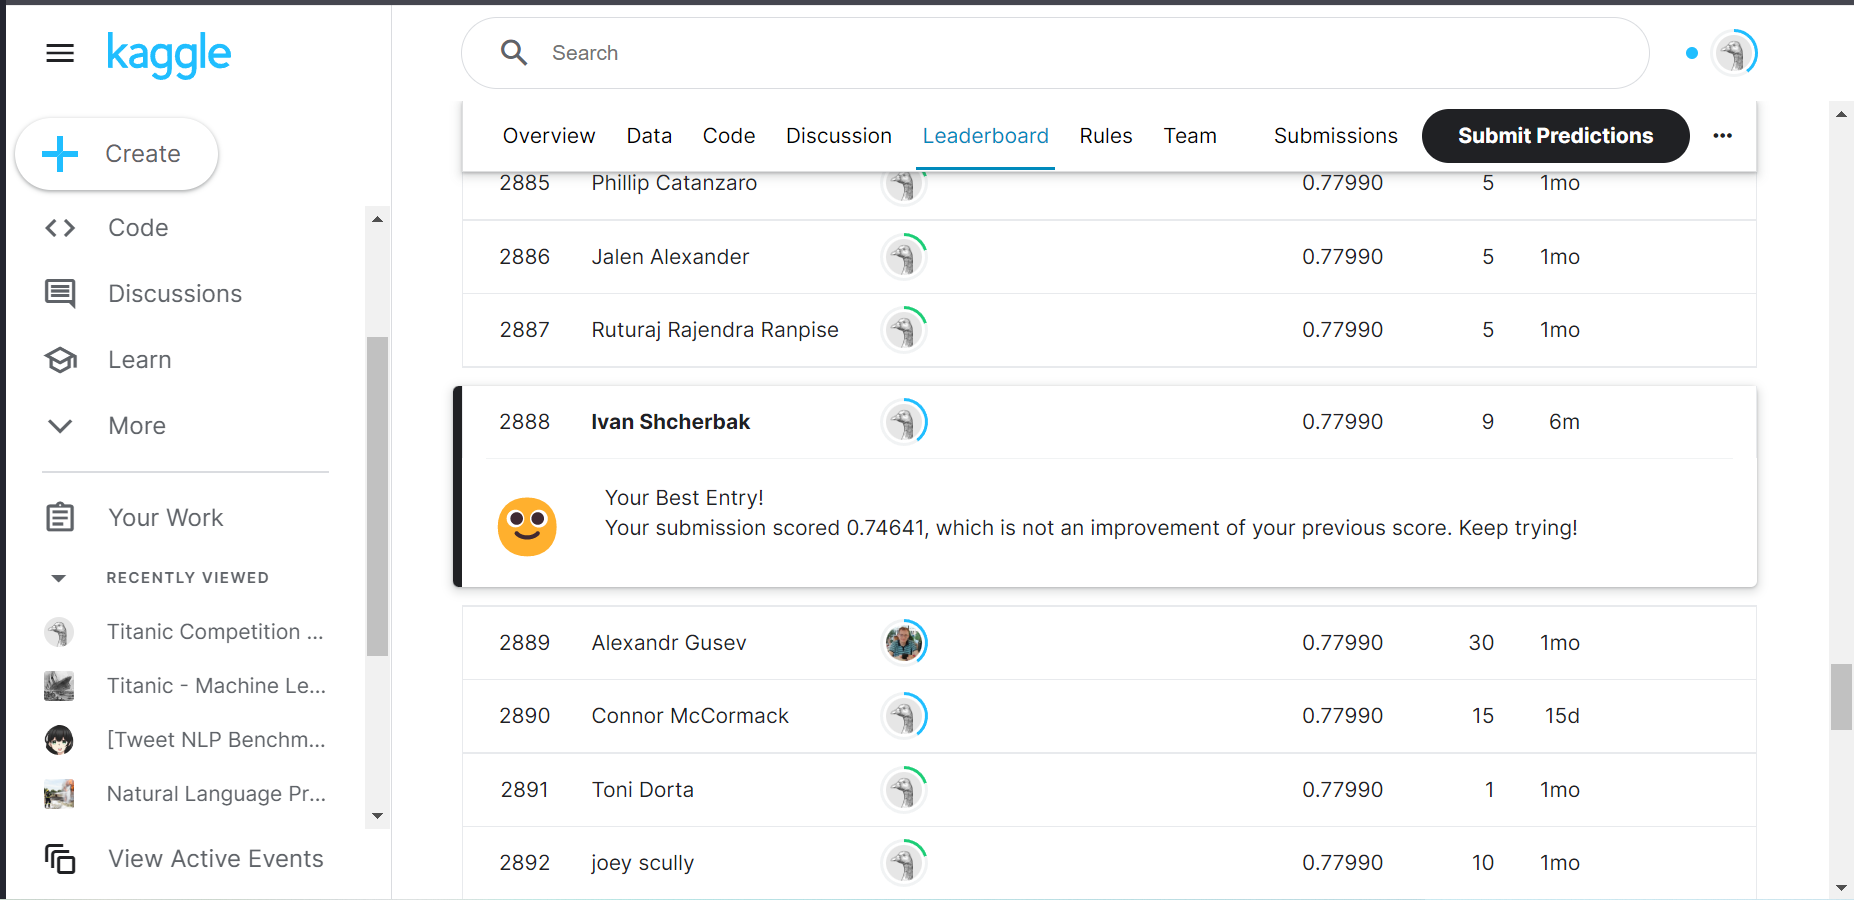